In [122]:
import numpy as np
import pandas as pd
import random
import copy

enki = ["A", "T", "G", "C"]

ref_list = random.choices(enki, k=10000)
reference = "".join(ref_list)
mutation = copy.copy(ref_list)

mutate_positions = [random.randint(0, 9999) for i in range(50)]
for pos in mutate_positions:
    ori = mutation[pos]
    if ori == "A":
        mutation[pos] = "T"
    elif ori == "T":
        mutation[pos] = "G"
    elif ori == "G":
        mutation[pos] = "C"
    elif ori == "C":
        mutation[pos] = "A"

mutation = "".join(mutation)

In [139]:
with open("simulation/mutations.fa", "w") as f:
    f.write(">chr1\n")
    f.write(mutation)

In [129]:
F2_genotype = [list(reference)]
F2_seq = []
F2_num = 100
for i in range(F2_num):
    recom_points = np.sort([random.randint(0, 9999) for i in range(10)])
    if random.randint(0, 9999) > 5000:
        new_geno = reference[:recom_points[0]]+mutation[recom_points[0]:recom_points[1]]+reference[recom_points[1]:recom_points[2]]+mutation[recom_points[2]:recom_points[3]]+\
        reference[recom_points[3]:recom_points[4]]+mutation[recom_points[4]:recom_points[5]]+reference[recom_points[5]:recom_points[6]]+mutation[recom_points[6]:recom_points[7]]+\
        reference[recom_points[7]:recom_points[8]]+mutation[recom_points[8]:recom_points[9]]+reference[recom_points[9]:]
    else:
        new_geno = mutation[:recom_points[0]]+reference[recom_points[0]:recom_points[1]]+mutation[recom_points[1]:recom_points[2]]+reference[recom_points[2]:recom_points[3]]+\
        mutation[recom_points[3]:recom_points[4]]+reference[recom_points[4]:recom_points[5]]+mutation[recom_points[5]:recom_points[6]]+reference[recom_points[6]:recom_points[7]]+\
        mutation[recom_points[7]:recom_points[8]]+reference[recom_points[8]:recom_points[9]]+mutation[recom_points[9]:]
    F2_genotype.append(list(new_geno))
    F2_seq.append(new_geno)

In [130]:
F2_genotype = pd.DataFrame(F2_genotype)
F2_genotype = F2_genotype.loc[:, (F2_genotype == F2_genotype.iloc[0, :]).sum() != 101]
mut_ratio = (F2_genotype == F2_genotype.iloc[0, :]).sum().values
print(list(mut_ratio).index(mut_ratio.max()))
mut_ind = list(mut_ratio).index(mut_ratio.max())
mut_ratio[list(mut_ratio).index(mut_ratio.max())]

19


66

In [131]:
with open("Cultivar.fa", "w") as f:
    f.write(">chr1\n")
    f.write(reference)

In [136]:
with open("F2_genome.fa", "w") as f:
    for i, key in enumerate((F2_genotype.iloc[1:, mut_ind] != F2_genotype.iloc[0, mut_ind]).values):
        if key:
            f.write(f">sample{i}\n")
            f.write(F2_seq[i])
            f.write("\n")

In [137]:
np.sort(mutate_positions)[mut_ind]

4369

In [ ]:
300 de wgsim -d 10 -1 20 -2 20 -N 150 CultivarB.fa Mutated_Cultivar_read.fastq Mutated_Cultivar_read2.fastq
3000   wgsim -d 100 -1 150 -2 150 -N 1500 F2_genome.fa bulked_1.fastq bulked_2.fastq

In [142]:
def simulate_fastq(F2_num):
    with open("genome/CultivarB.fa", mode="r") as f:
        ref = f.readlines()[1]
    with open("simulation/mutations.fa", mode="r") as f:
        mut = f.readlines()[1]

    F2_genotype = [list(reference)]
    F2_seq = []
    for i in range(F2_num):
        recom_points = np.sort([random.randint(0, 9999) for i in range(10)])
        if random.randint(0, 9999) > 5000:
            new_geno = reference[:recom_points[0]]+mutation[recom_points[0]:recom_points[1]]+reference[recom_points[1]:recom_points[2]]+mutation[recom_points[2]:recom_points[3]]+\
            reference[recom_points[3]:recom_points[4]]+mutation[recom_points[4]:recom_points[5]]+reference[recom_points[5]:recom_points[6]]+mutation[recom_points[6]:recom_points[7]]+\
            reference[recom_points[7]:recom_points[8]]+mutation[recom_points[8]:recom_points[9]]+reference[recom_points[9]:]
        else:
            new_geno = mutation[:recom_points[0]]+reference[recom_points[0]:recom_points[1]]+mutation[recom_points[1]:recom_points[2]]+reference[recom_points[2]:recom_points[3]]+\
            mutation[recom_points[3]:recom_points[4]]+reference[recom_points[4]:recom_points[5]]+mutation[recom_points[5]:recom_points[6]]+reference[recom_points[6]:recom_points[7]]+\
            mutation[recom_points[7]:recom_points[8]]+reference[recom_points[8]:recom_points[9]]+mutation[recom_points[9]:]
        F2_genotype.append(list(new_geno))
        F2_seq.append(new_geno)
        
        F2_genotype = pd.DataFrame(F2_genotype)
        F2_genotype = F2_genotype.loc[:, (F2_genotype == F2_genotype.iloc[0, :]).sum() != F2_num+1]
        
        with open("F2_genome.fa", "w") as f:
            for i, key in enumerate((F2_genotype.iloc[1:, 19] != F2_genotype.iloc[0, 19]).values):
                if key:
                    f.write(f">sample{i}\n")
                    f.write(F2_seq[i])
                    f.write("\n")

# QTLseq

(array([ 2.,  4.,  4.,  7.,  7., 13.,  5.,  6.,  1.,  1.]),
 array([-14.92437306, -12.17218684,  -9.42000062,  -6.6678144 ,
         -3.91562818,  -1.16344196,   1.58874425,   4.34093047,
          7.09311669,   9.84530291,  12.59748913]),
 <BarContainer object of 10 artists>)

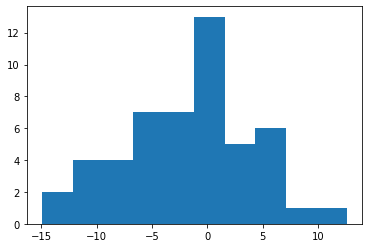

In [545]:
import numpy as np
import matplotlib.pyplot as plt

mu = 0
sigma = 7
n_sample = 50
effects = np.random.normal(mu, sigma, n_sample)
plt.hist(effects)

In [488]:
# effects[8] = -30
effects[16] = 70
# effects = effects+1
effects
# -1.37204775e+01
# 1.30497216e+01

array([-7.19080303e+00,  1.65323221e+00,  6.16302847e+00, -7.53959707e+00,
       -3.29451769e+00,  7.12908320e+00,  9.06992141e+00, -8.24829958e+00,
        3.53728589e+00, -2.23491173e+00,  8.87282126e+00, -9.33355325e+00,
       -1.46406120e+01,  5.40409423e-02,  5.01504533e+00,  3.57417937e+00,
        7.00000000e+01,  4.47535116e+00, -4.25131518e+00, -2.51073775e+00,
        9.78223694e+00,  2.99521140e+00,  5.31440452e+00, -3.61766074e+00,
       -1.06752737e+01, -2.00585818e+00, -5.95507300e+00, -8.00995916e+00,
        2.11211262e+01, -2.74807887e-01, -1.30387231e+01, -7.07635741e+00,
        1.62951680e+00, -1.18776647e+01,  3.33869821e-01,  2.47881267e+00,
       -8.85885311e-01, -9.81369743e+00,  4.98820461e+00,  1.47575321e+00,
       -8.18204435e+00, -4.55648477e+00,  9.89826991e+00, -3.05333408e+00,
        7.57112904e+00, -1.08565929e+01,  1.56694537e-01, -1.44295796e+01,
        4.13322390e+00, -7.80915265e+00])

In [489]:
print(np.sort(mutate_positions)[8])
print(np.sort(mutate_positions)[16])

1870
3194


In [425]:
import numpy as np
import pandas as pd
import random
import copy

enki = ["A", "T", "G", "C"]

ref_list = random.choices(enki, k=10000)
reference = "".join(ref_list)
mutation = copy.copy(ref_list)

mutate_positions = [random.randint(0, 9999) for i in range(50)]
for pos in mutate_positions:
    ori = mutation[pos]
    if ori == "A":
        mutation[pos] = "T"
    elif ori == "T":
        mutation[pos] = "G"
    elif ori == "G":
        mutation[pos] = "C"
    elif ori == "C":
        mutation[pos] = "A"

mutation = "".join(mutation)

In [426]:
with open("genome2/CultivarB.fa", "w") as f:
    f.write(">chr1\n")
    f.write(reference)

In [542]:
F2_genotype = [list(reference)]
F2_seq = []
F2_num = 100
for i in range(F2_num):
    recom_points = np.sort([random.randint(0, 9999) for i in range(10)])
    if random.randint(0, 9999) > 5000:
        new_geno = reference[:recom_points[0]]+mutation[recom_points[0]:recom_points[1]]+reference[recom_points[1]:recom_points[2]]+mutation[recom_points[2]:recom_points[3]]+\
        reference[recom_points[3]:recom_points[4]]+mutation[recom_points[4]:recom_points[5]]+reference[recom_points[5]:recom_points[6]]+mutation[recom_points[6]:recom_points[7]]+\
        reference[recom_points[7]:recom_points[8]]+mutation[recom_points[8]:recom_points[9]]+reference[recom_points[9]:]
    else:
        new_geno = mutation[:recom_points[0]]+reference[recom_points[0]:recom_points[1]]+mutation[recom_points[1]:recom_points[2]]+reference[recom_points[2]:recom_points[3]]+\
        mutation[recom_points[3]:recom_points[4]]+reference[recom_points[4]:recom_points[5]]+mutation[recom_points[5]:recom_points[6]]+reference[recom_points[6]:recom_points[7]]+\
        mutation[recom_points[7]:recom_points[8]]+reference[recom_points[8]:recom_points[9]]+mutation[recom_points[9]:]
    F2_genotype.append(list(new_geno))
    F2_seq.append(new_geno)
F2_genotype = pd.DataFrame(F2_genotype)
F2_genotype = F2_genotype.loc[:, (F2_genotype == F2_genotype.iloc[0, :]).sum() != 101]

(array([ 2.,  3.,  3.,  7.,  6.,  4.,  6., 10.,  9.,  7.,  4.,  3.,  9.,
         9.,  9.,  2.,  3.,  2.,  1.,  1.]),
 array([  9.09672585,  19.17508557,  29.25344528,  39.331805  ,
         49.41016471,  59.48852443,  69.56688415,  79.64524386,
         89.72360358,  99.80196329, 109.88032301, 119.95868273,
        130.03704244, 140.11540216, 150.19376187, 160.27212159,
        170.35048131, 180.42884102, 190.50720074, 200.58556045,
        210.66392017]),
 <BarContainer object of 20 artists>)

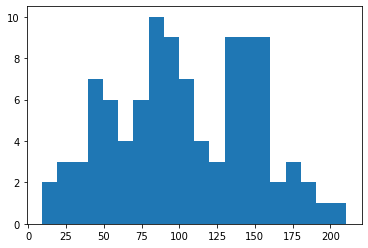

In [543]:
F2_genotype_TF = F2_genotype != F2_genotype.iloc[0, :]
phenotypes = []
for i in range(F2_num):
    phenotypes.append(100 + sum(effects[F2_genotype_TF.iloc[i+1, :].values]))
plt.hist(phenotypes, bins=20)

In [482]:
with open("low_10_F2_genome.fa", "w") as f:
    for i in np.argsort(phenotypes)[:10]:
        f.write(f">sample{i}\n")
        f.write(F2_seq[i])
        f.write("\n")
        
with open("high_10_F2_genome.fa", "w") as f:
    for i in np.argsort(phenotypes)[-10:]:
        f.write(f">sample{i}\n")
        f.write(F2_seq[i])
        f.write("\n")

In [483]:
import os
os.system(f'wgsim -e 0 -r 0 -R 0 -X 0 -d 300 -1 150 -2 150 -N 500 low_10_F2_genome.fa reads2/low_bulked_read1.fastq reads2/low_bulked_read2.fastq')
os.system(f'wgsim -e 0 -r 0 -R 0 -X 0 -d 300 -1 150 -2 150 -N 500 high_10_F2_genome.fa reads2/high_bulked_read1.fastq reads2/high_bulked_read2.fastq')

0